<a href="https://colab.research.google.com/github/Kkhokho/Dog/blob/main/Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Dog Classification/dog-breed-identification.zip" -d "drive/MyDrive/Dog Classification"

Archive:  /content/drive/MyDrive/Dog Classification/dog-breed-identification.zip
replace drive/MyDrive/Dog Classification/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# End - to - end Multil-class Dog Breed Classification

This notebook builds an end - to - end multil-class image classifier using TensorFlow and TensorFlow Hub.

## 1.Problem
Identifying the breed of a dog given image of a dog.

When i take a photo of a dog, i wanna to know what kind of breed of a dog.
## 2.Data

The data w using from kaggle's dog breed identification competition

https://www.kaggle.com/competitions/dog-breed-identification/data?select=sample_submission.csv
## 3.Evaluation

The evaluation is a file with prediction probalities for each dog breed of each test image.

## 4.Features

Some information about data:
* we dealing with images (untructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set and test set

### Get our workspace ready

* Import Tensorflow 2.x
* Import TensorFlow Hub
* Make sure we are using GPU

In [ ]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:" ,tf.__version__)
print("TF Hub version: ",hub.__version__)

# Check for GPU availability
print("GPU","availabel (Yes)" if tf.config.list_physical_devices("GPU") else "not availabel")

TF version: 2.12.0
TF Hub version:  0.14.0
GPU availabel (Yes)


In [ ]:
# Using GPU to increase the speed

## Getting our data ready (turning into Tensors)

Let's start by accessing our data and checking out the labels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
label_csv = pd.read_csv("drive/MyDrive/Dog Classification/labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

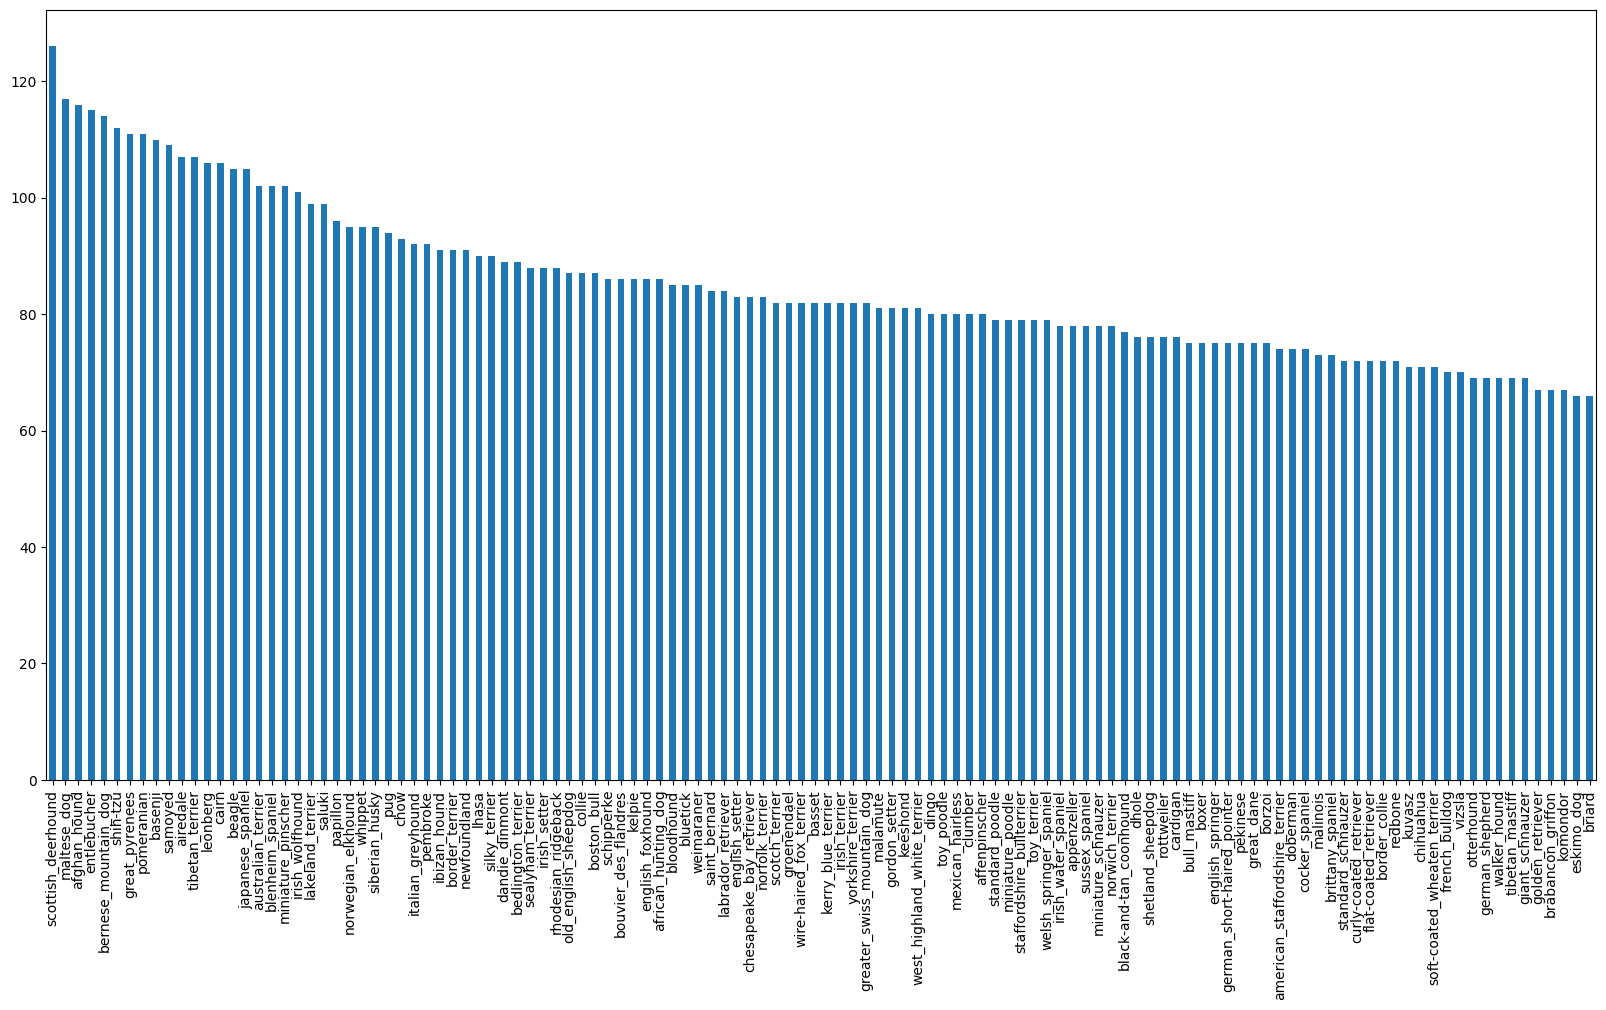

In [ ]:
# How many images are there of each breed?
label_csv["breed"].value_counts().plot(kind='bar',figsize=(20,10));

In [ ]:
label_csv["breed"].value_counts().mean()

85.18333333333334

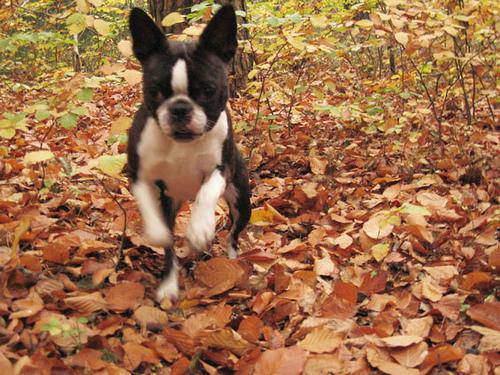

In [ ]:
# Let's view an image

Image("drive/My Drive/Dog Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

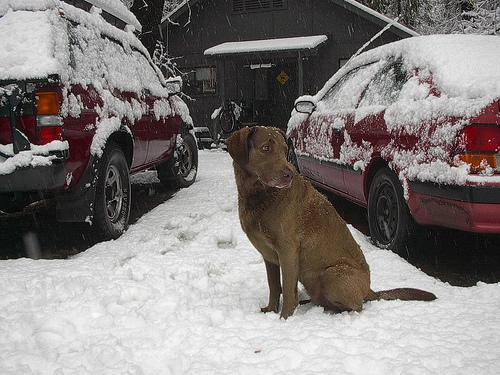

In [ ]:
Image("drive/My Drive/Dog Classification/train/fff43b07992508bc822f33d8ffd902ae.jpg")

### Getting images and their labels

Let's get a list of our images file pathnames

In [ ]:
filenames = ["drive/My Drive/Dog Classification/train/" + fname + ".jpg" for fname in label_csv["id"]]

In [ ]:
filenames[:10]

['drive/My Drive/Dog Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Kiểm tra xem số lượng file đã match với số file thực tế hay chưa
if len(os.listdir("drive/My Drive/Dog Classification/train/")) == len(filenames):
  print("match")
else:
  print("not match")

match


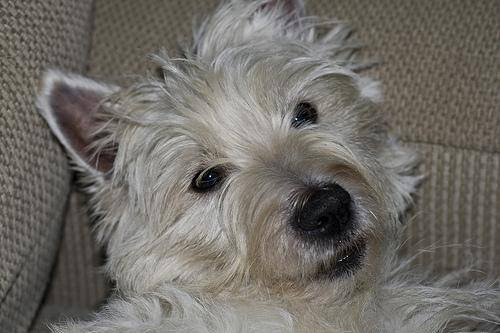

In [ ]:
# Check one more time
Image(filenames[9010])

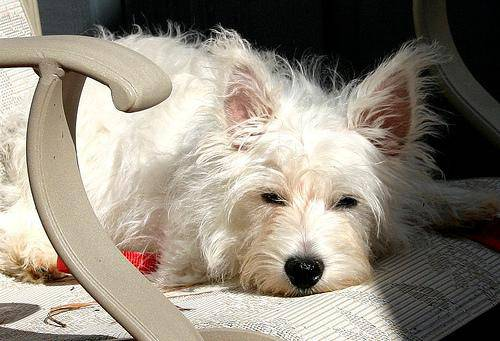

In [ ]:
Image(filenames[9011])

In [ ]:
filenames[9010]

'drive/My Drive/Dog Classification/train/e23950a981b81588f00133a2c0c5cfb7.jpg'

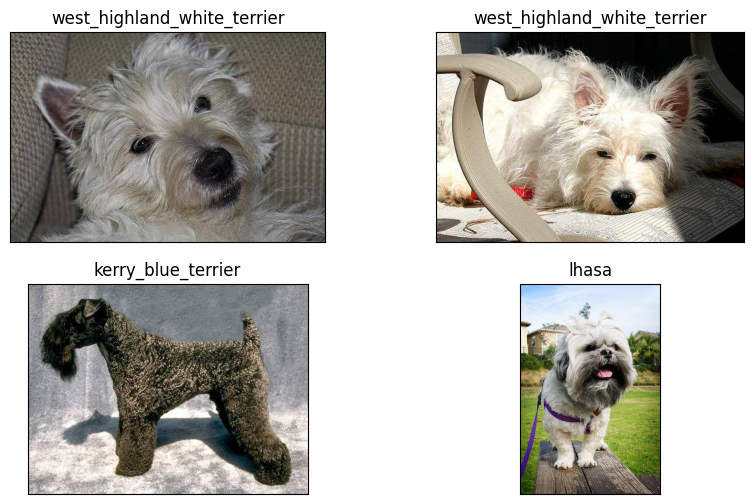

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize = (10,6))
image_path = filenames[9010]
img = Image.open(image_path)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(label_csv["breed"][9010])
ax1.imshow(img)

image_path = filenames[9011]
img = Image.open(image_path)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(label_csv["breed"][9011])
ax2.imshow(img)

image_path = filenames[9012]
img = Image.open(image_path)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(label_csv["breed"][9012])
ax3.imshow(img)

image_path = filenames[9013]
img = Image.open(image_path)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title(label_csv["breed"][9013])
ax4.imshow(img)

In [ ]:
labels = label_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
labels = np.array(labels)
len(labels)

10222

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds,len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
print(labels[1000]) # original label
print(np.where(unique_breeds == labels[1000])[0][0]) # index where label occurs
print(boolean_labels[1000].argmax()) # index where label occurs in boolean array
print(boolean_labels[1000].astype(int)) # there will be a 1 where the sample label occurs

irish_setter
56
56
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [ ]:
X = filenames
y = boolean_labels
print(len(X))
print(len(y))

10222
10222


In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:5000,step:1000}

In [ ]:
# Split data into train and validation
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=12)

len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
print(X_train[:2])
print(y_train[:2])

['drive/My Drive/Dog Classification/train/00bee065dcec471f26394855c5c2f3de.jpg', 'drive/My Drive/Dog Classification/train/0d2f9e12a2611d911d91a339074c8154.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False

## Preprocessing Images

Writing some function which does a few things:
1. Take an image filepath input
2. Use TensorFlow to read the file and save it to a variable,`image`
3. Change our `image` (a jpg) into Tensor
4. Resize the `image` to be the same size, I choose the shape is (224,224)
5. Return the modified `image`

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0])
image

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]

In [ ]:
image.shape

(375, 500, 3)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
IMG_SIZE = 224

def preprocess(image_path):
  image = tf.io.read_file(image_path)
  # Turn image into numerical Tensor with 3 colour channels (red,green,blue)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

In [ ]:
def get_image_and_label(image_path,label):
  image = preprocess(image_path)
  return image,label

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y = None, batch_size = BATCH_SIZE, a = False, boolean_test = False):
# We don't have label in test_data
  if boolean_test:
    print("Creating test data batches on test_data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(preprocess).batch(BATCH_SIZE)
    return data_batch

  elif a:
    print("Creating validation data batches on valid_data")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X),#filepaths
                                              tf.constant(y))  #labels
    if tf.greater(data.cardinality(), 0):  # Check if the dataset is not empty
      data = data.map(get_image_and_label)
      data_batch = data.batch(BATCH_SIZE)
      return data_batch
    else:
      print("Validation dataset is empty.")
      return None
  else:
    print("Creating training data batches on train_data")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                          tf.constant(y))) #labels
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_and_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, boolean_valid=False, boolean_test=False):
    if boolean_test:
        print("Creating test data batches on test_data")
        data = tf.data.Dataset.from_tensor_slices(X)
        data_batch = data.map(preprocess).batch(BATCH_SIZE)
        return data_batch

    elif boolean_valid:
        print("Creating validation data batches on valid_data")
        data = tf.data.Dataset.from_tensor_slices((X, y))
        data = data.map(get_image_and_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches on train_data")

        data = tf.data.Dataset.from_tensor_slices((X, y))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_and_label)

        data_batch = data.batch(BATCH_SIZE)
        return data_batch

# Example usage
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X=X_val, y=y_val, boolean_valid=True)


Creating training data batches on train_data
Creating validation data batches on valid_data


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

##Visualizing data batches

In [ ]:
def show_16_images(images, labels):
  # Setup the figure
  plt.figure(figsize=(20, 10))
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

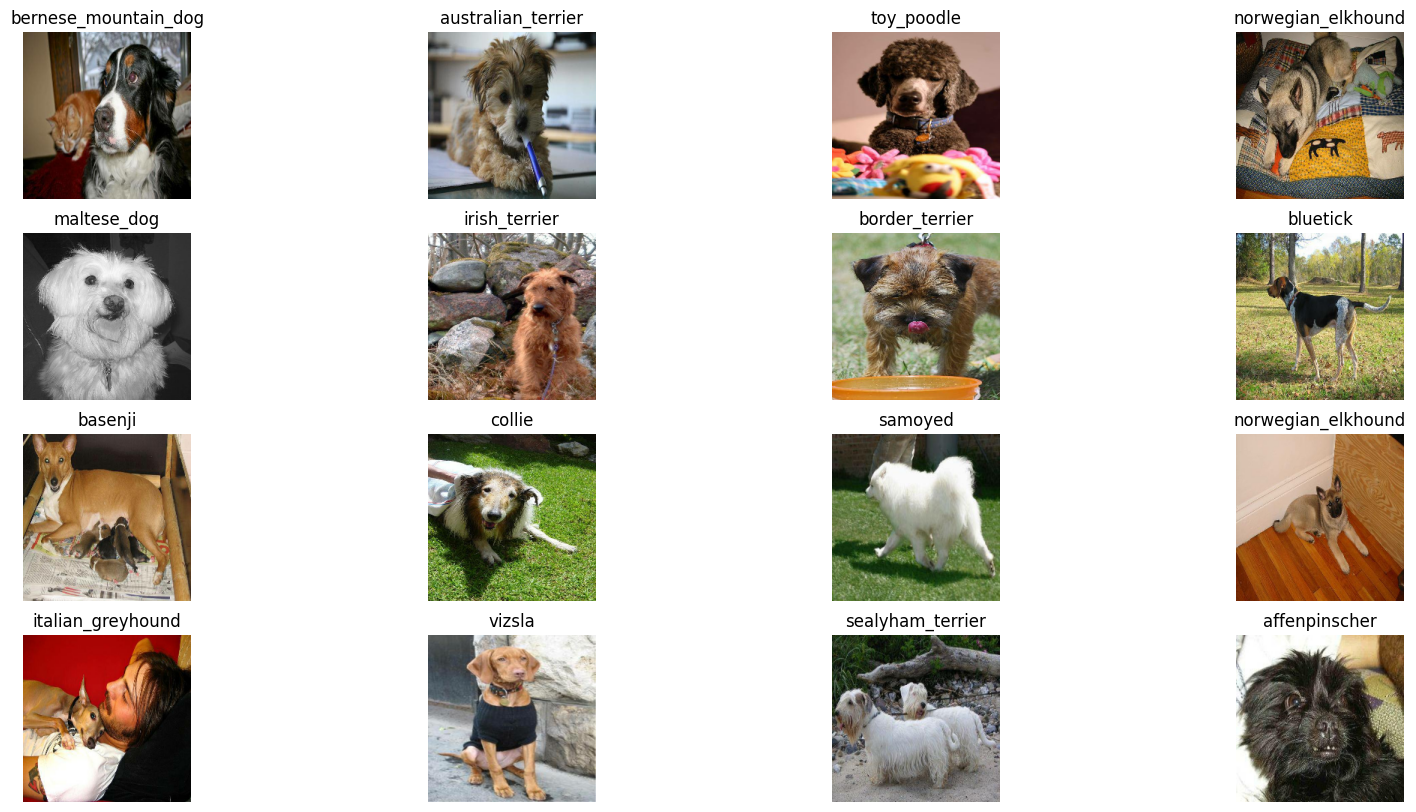

In [ ]:
# A loop for a TensorFlow Dataset so each time we run this cell, the different results
train_images, train_labels = next(train_data.as_numpy_iterator())
show_16_images(train_images, train_labels)

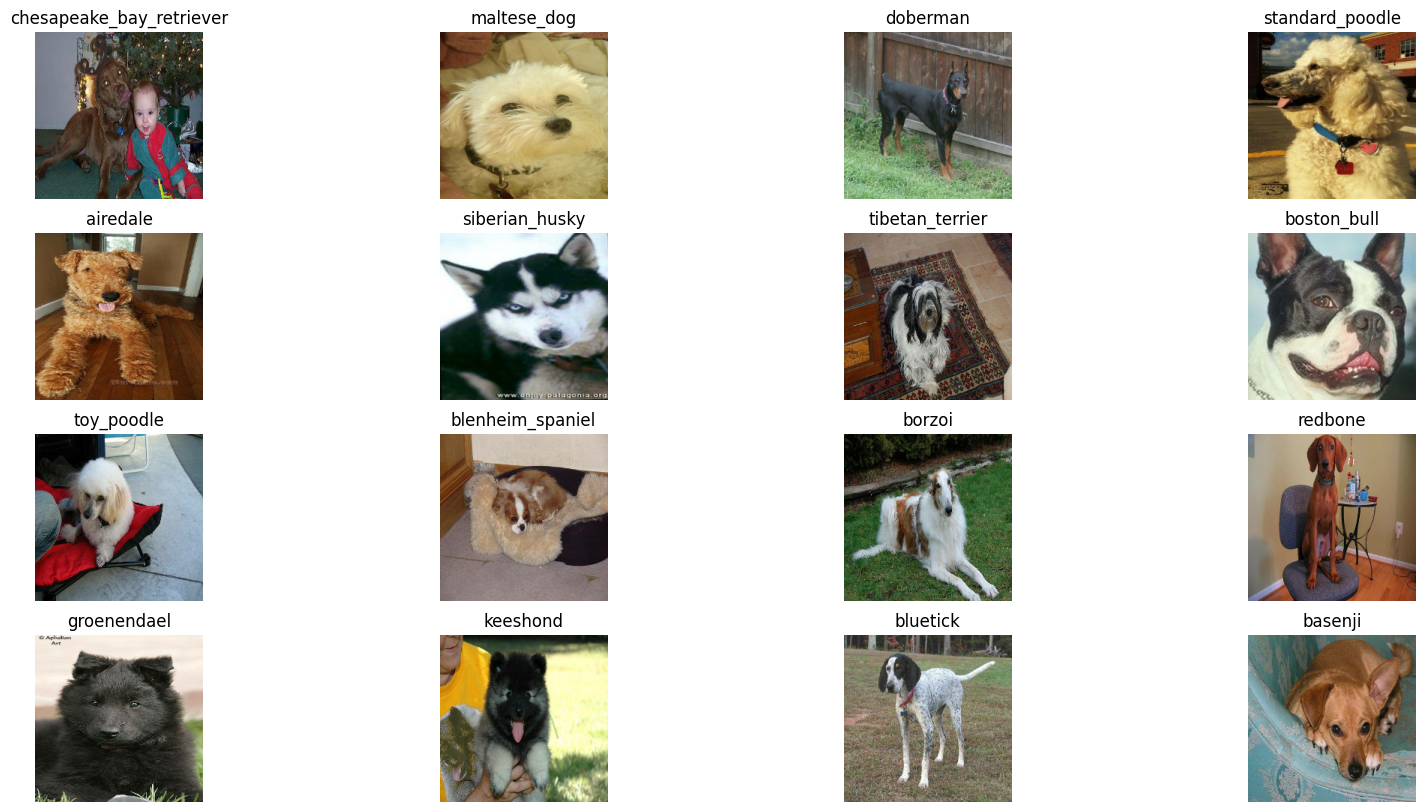

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_16_images(val_images, val_labels)

## Creating and Training model
Using **transfer learning**

Because We have to solve image classification so we use model has learned in https://www.kaggle.com/models?module-type=image-classification&tfhub-redirect=true&task=16686



*   The input shape (images, in the form of Tensors) to our model.
*   The output shape (image labels, in the form of Tensors) of our model.
*   The URL of the model we want to use.



In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

OUTPUT_SHAPE = len(unique_breeds) # We want each dog in an image has % of each breed

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation = "softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Classification/Logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  # Làm như vậy để log directory được theo dõi bất cứ khi nào chúng tôi chạy thử nghiệm
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)
# dừng lại sau 3 lần k cải thiện accuracy của tập validation

In [ ]:
print("GPU", "is available" if tf.config.list_physical_devices("GPU") else "not available :(")
# if we don't use GPU for computing, this is very very slowly

GPU is available


In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq=1, # check validation metrics every epoch,
            callbacks = [tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 7s 130ms/step - loss: 4.5509 - accuracy: 0.0988 - val_loss: 3.1765 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 4s 146ms/step - loss: 1.6332 - accuracy: 0.6888 - val_loss: 1.9534 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 4s 154ms/step - loss: 0.5543 - accuracy: 0.9425 - val_loss: 1.4822 - val_accuracy: 0.6400
Epoch 4/100
25/25 [==============================] - 4s 172ms/step - loss: 0.2433 - accuracy: 0.9912 - val_loss: 1.3391 - val_accuracy: 0.6700
Epoch 5/100
25/25 [==============================] - 4s 174ms/step - loss: 0.1424 - accuracy: 0.9975 - val_loss: 1.2738 - val_accuracy: 0.6950
Epoch 6/100
25/25 [==============================] - 4s 170ms/step - loss: 0.0980 - accuracy: 1.0000 - val_loss: 1.2244 - val_accuracy: 0.6900
Epoch 7/100
25/25 [=============================

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Classification/Logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-11-20 09:10:30.173830: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 09:10:30.173916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 09:10:30.173960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 09:10:31.131677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorf

##Making and evaluating predictions using a trained model

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 18s 76ms/step


array([[1.03070946e-04, 1.08267193e-06, 9.98157816e-07, ...,
        1.67063172e-05, 6.06181447e-06, 6.39866121e-05],
       [1.73878594e-04, 4.49655017e-05, 1.37232546e-05, ...,
        3.45214016e-06, 6.23052765e-04, 7.12925056e-03],
       [1.95636690e-04, 9.78456927e-04, 6.26392693e-06, ...,
        8.87914211e-04, 3.14882520e-04, 3.00600979e-04],
       ...,
       [2.83617643e-04, 2.28801600e-05, 8.41140805e-04, ...,
        3.10087256e-04, 2.10172730e-05, 4.27311577e-04],
       [1.26259547e-04, 6.93826078e-05, 1.29118664e-04, ...,
        9.72901355e-04, 8.02983122e-05, 1.85439829e-04],
       [3.99791257e-04, 1.62052878e-04, 3.32730724e-06, ...,
        1.44642091e-03, 3.17586295e-04, 4.74896136e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
print(predictions[0])
print(f"Max probality of prediction: {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be near to 1
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[1.03070946e-04 1.08267193e-06 9.98157816e-07 2.64561440e-05
 2.43488921e-05 4.87799407e-05 5.36288753e-05 2.11528186e-06
 3.39700382e-05 1.45395325e-06 3.58394118e-06 1.11832678e-05
 2.14083673e-04 3.29895897e-06 1.67571234e-05 2.90030812e-06
 4.92863865e-06 2.20255720e-06 1.88798381e-07 5.83476276e-06
 6.44973443e-06 6.44357133e-05 8.15777912e-06 8.29913552e-06
 1.77646856e-04 1.70872190e-05 6.71933606e-07 8.56968938e-07
 9.59638178e-01 1.91795407e-04 1.34612041e-04 7.98863653e-07
 3.20999038e-06 5.41336303e-05 2.34175732e-05 6.01437989e-07
 3.30454641e-05 5.66034760e-05 7.18876254e-05 6.66648248e-06
 1.85884198e-06 7.34457490e-06 2.01801839e-07 7.87109529e-05
 8.25293955e-06 5.78512299e-06 8.99476345e-06 1.56569469e-03
 8.50768447e-06 5.18313791e-05 1.72454111e-05 1.43634010e-04
 5.38493005e-05 2.50788298e-06 1.31316601e-05 1.99852434e-06
 2.20600609e-02 1.70430914e-03 1.46518491e-04 1.14403359e-04
 4.61357158e-05 1.36785256e-05 8.88081013e-06 2.88913743e-05
 1.97951977e-06 5.112707

In [ ]:
print(predictions[1])
print(f"Max probality of prediction: {np.max(predictions[1])}")
print(f"Sum: {np.sum(predictions[1])}") # because we used softmax activation in our model, this will be near to 1
print(f"Predicted label: {unique_breeds[np.argmax(predictions[1])]}") # the predicted label

[1.73878594e-04 4.49655017e-05 1.37232546e-05 6.07668262e-05
 8.24503149e-05 1.77364709e-04 7.85006196e-05 9.55344731e-05
 4.81437783e-05 6.19070997e-05 6.09072624e-04 2.02172323e-05
 4.45389269e-05 2.57877051e-04 1.78724858e-05 1.02991857e-04
 5.27254451e-05 1.29476131e-04 1.31237562e-06 9.51180991e-05
 5.36297011e-05 1.10636966e-03 7.52855616e-04 6.63651463e-07
 1.00830293e-05 1.25256247e-05 7.59730974e-05 3.10753967e-05
 2.28334393e-05 2.61890294e-04 7.16342493e-06 1.88712565e-05
 1.18187563e-04 7.71942632e-06 1.74803608e-05 6.18620194e-04
 3.36614335e-06 9.47134322e-06 7.99830104e-06 2.95314094e-04
 3.09740863e-05 3.40509068e-05 3.07231094e-05 2.56400508e-05
 7.80230257e-05 4.05037572e-05 6.63955348e-07 3.89884335e-05
 2.47663938e-05 2.85169826e-05 1.66295758e-05 6.54801897e-06
 1.37649749e-05 7.66897574e-05 6.33585978e-06 2.60125726e-05
 6.22856078e-06 1.93097494e-05 1.69124251e-05 6.46450871e-06
 2.73801961e-05 6.57071767e-04 1.36652425e-05 7.77139430e-05
 6.18193808e-05 3.650329

In [ ]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'chesapeake_bay_retriever'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)


In [ ]:
val_images[0], val_labels[0]

(array([[[0.46274513, 0.4784314 , 0.5254902 ],
         [0.4666667 , 0.48235297, 0.5294118 ],
         [0.46635157, 0.48203784, 0.52909666],
         ...,
         [0.8523413 , 0.9281088 , 0.9348725 ],
         [0.26055378, 0.32678348, 0.34063068],
         [0.51916856, 0.56972545, 0.5737312 ]],
 
        [[0.46274513, 0.4784314 , 0.5254902 ],
         [0.4666667 , 0.48235297, 0.5294118 ],
         [0.46635157, 0.48203784, 0.52909666],
         ...,
         [0.38830936, 0.4717502 , 0.491557  ],
         [0.4260326 , 0.48295736, 0.4757619 ],
         [0.13544655, 0.18176131, 0.16876625]],
 
        [[0.46274513, 0.4784314 , 0.5254902 ],
         [0.4666667 , 0.48235297, 0.5294118 ],
         [0.46635157, 0.48203784, 0.52909666],
         ...,
         [0.1335185 , 0.20749776, 0.20739275],
         [0.23494363, 0.27650765, 0.24681807],
         [0.26555976, 0.29635262, 0.2590319 ]],
 
        ...,
 
        [[0.16072737, 0.26660973, 0.24700189],
         [0.18529053, 0.2911729 , 0.27156

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

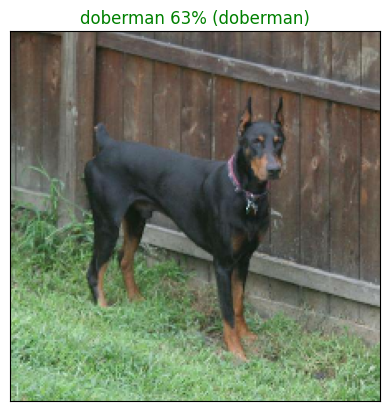

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n=2)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

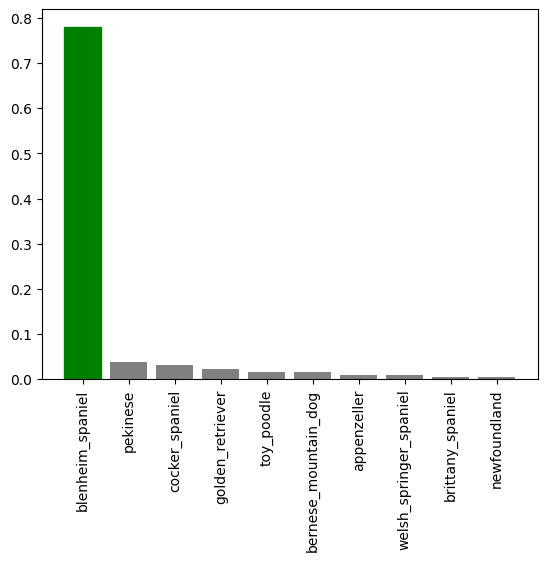

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

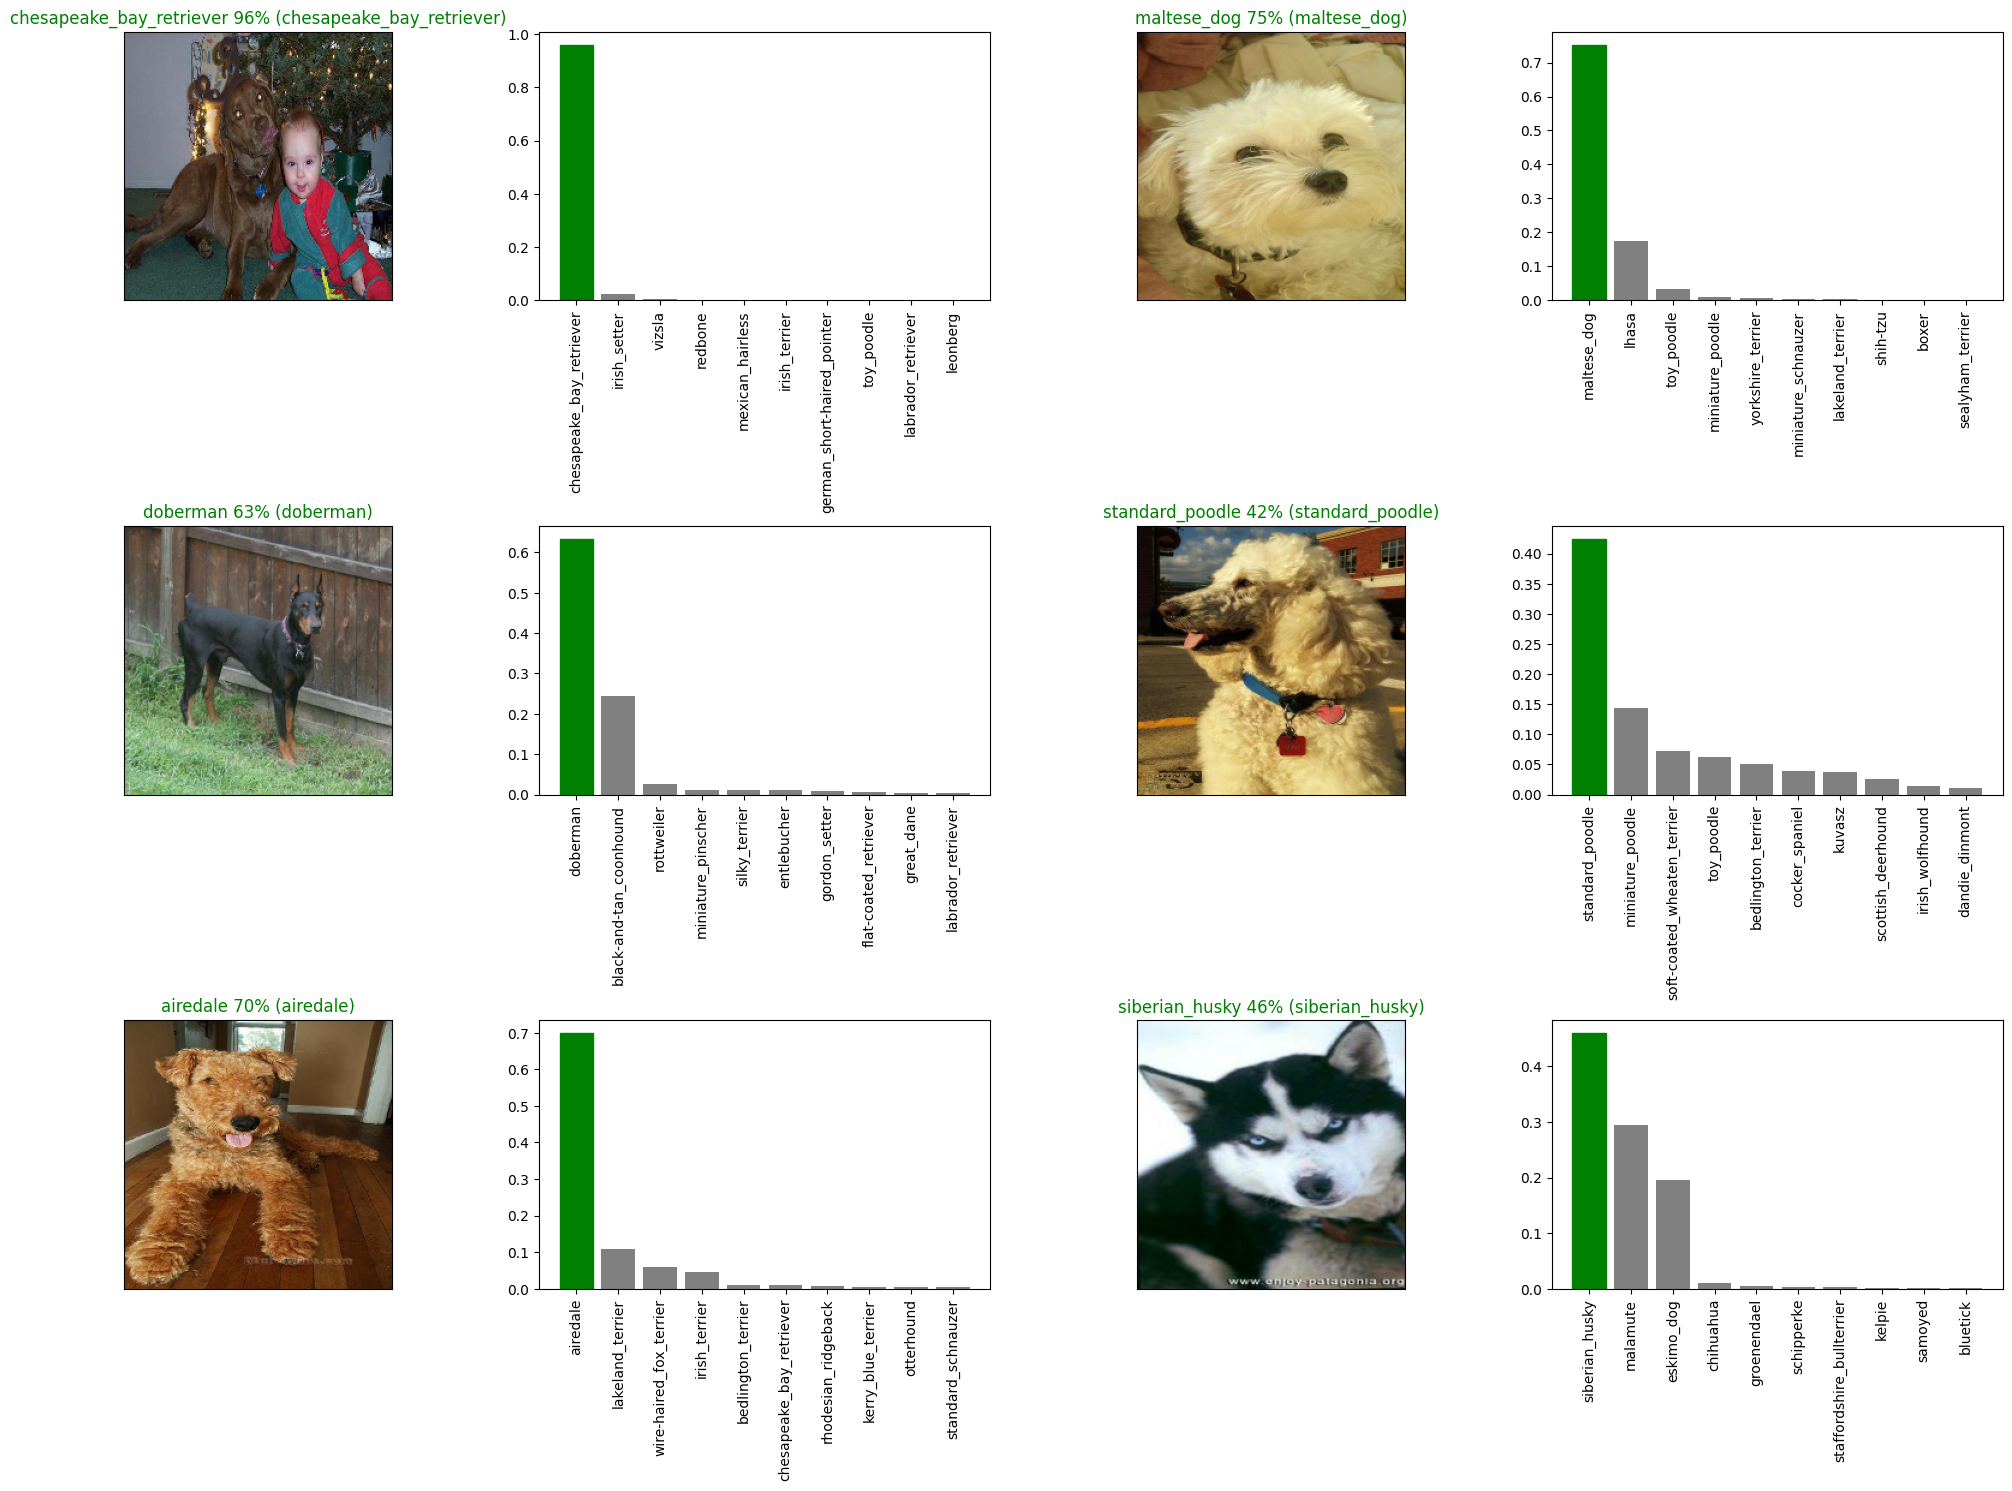

In [ ]:
# Let's check a few predictions and their different values
count = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n = i + count)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n = i + count)
plt.tight_layout(h_pad=1.0)
plt.show()

##Training on full data

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches on train_data


In [ ]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()
# Early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=5)

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Classification/Logs

Launching TensorBoard...

KeyboardInterrupt: ignored

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100
307/320 [===========================>..] - ETA: 1:07 - loss: 1.3646 - accuracy: 0.6673